# Teste de Friedman + Pós-teste (Nemenyi)

In [1]:
!pip install orange3 -q

# Dados de entrada do teste

Uma tabela m x n

m = linhas dos métodos (sugiro baseline + 2 variações da proposta mudando embeddings), totalizando 3 métodos.

n = coluna dos datasets

células: valores MÉDIOS das entropias

In [1]:
import pandas as pd

classic4_baseline = pd.read_parquet('../models/predictions/baseline/df_results_baseline_classic4.parquet.gzip')
cstr_baseline = pd.read_parquet('../models/predictions/baseline/df_results_baseline_CSTR.parquet.gzip')
dmoz_Computers_baseline = pd.read_parquet('../models/predictions/baseline/df_results_baseline_Dmoz-Computers.parquet.gzip')
dmoz_Health_baseline = pd.read_parquet('../models/predictions/baseline/df_results_baseline_Dmoz-Health.parquet.gzip')
dmoz_Science_baseline = pd.read_parquet('../models/predictions/baseline/df_results_baseline_Dmoz-Science.parquet.gzip')
dmoz_Sports_baseline = pd.read_parquet('../models/predictions/baseline/df_results_baseline_Dmoz-Sports.parquet.gzip')
industry_Sector_baseline = pd.read_parquet('../models/predictions/baseline/df_results_baseline_Industry_Sector.parquet.gzip')
nsf_baseline = pd.read_parquet('../models/predictions/baseline/df_results_baseline_NSF.parquet.gzip')
re8_baseline = pd.read_parquet('../models/predictions/baseline/df_results_baseline_re8.parquet.gzip')
webkb_parsed_baseline = pd.read_parquet('../models/predictions/baseline/df_results_baseline_webkb-parsed.parquet.gzip')

In [2]:
baseline_list = [classic4_baseline, cstr_baseline, dmoz_Computers_baseline, dmoz_Health_baseline, dmoz_Science_baseline, dmoz_Sports_baseline, industry_Sector_baseline, nsf_baseline, re8_baseline, webkb_parsed_baseline]
baseline_names = ['classic4', 'cstr', 'dmoz_Computers', 'dmoz_Health', 'dmoz_Science', 'dmoz_Sports', 'industry_Sector', 'nsf', 're8', 'webkb_parsed']

In [3]:
mean_baseline_list = []

flag=0
while flag<10:
    x=baseline_list[flag]
    y=x['entropy'].mean()
    dict_1 = {f'{baseline_names[flag]}': y}
    mean_baseline_list.append(dict_1)  
    flag+=1
    
result = {}
for dataframe in mean_baseline_list:
   result.update(dataframe)

dct = {k:[v] for k,v in result.items()}  # WORKAROUND
df1 = pd.DataFrame(dct)

In [5]:
import pandas as pd

classic4_proposal = pd.read_parquet('../models/predictions/proposal/df_results_proposal_classic4.parquet.gzip')
cstr_proposal = pd.read_parquet('../models/predictions/proposal/df_results_proposal_CSTR.parquet.gzip')
dmoz_Computers_proposal = pd.read_parquet('../models/predictions/proposal/df_results_proposal_Dmoz-Computers.parquet.gzip')
dmoz_Health_proposal = pd.read_parquet('../models/predictions/proposal/df_results_proposal_Dmoz-Health.parquet.gzip')
dmoz_Science_proposal = pd.read_parquet('../models/predictions/proposal/df_results_proposal_Dmoz-Science.parquet.gzip')
dmoz_Sports_proposal = pd.read_parquet('../models/predictions/proposal/df_results_proposal_Dmoz-Sports.parquet.gzip')
industry_Sector_proposal = pd.read_parquet('../models/predictions/proposal/df_results_proposal_Industry_Sector.parquet.gzip')
nsf_proposal = pd.read_parquet('../models/predictions/proposal/df_results_proposal_NSF.parquet.gzip')
re8_proposal = pd.read_parquet('../models/predictions/proposal/df_results_proposal_re8.parquet.gzip')
webkb_parsed_proposal = pd.read_parquet('../models/predictions/proposal/df_results_proposal_webkb-parsed.parquet.gzip')

proposal_list = [classic4_proposal, cstr_proposal, dmoz_Computers_proposal, dmoz_Health_proposal, dmoz_Science_proposal, dmoz_Sports_proposal, industry_Sector_proposal, nsf_proposal, re8_proposal, webkb_parsed_proposal]

In [6]:
proposal_list = [classic4_proposal, cstr_proposal, dmoz_Computers_proposal, dmoz_Health_proposal, dmoz_Science_proposal, dmoz_Sports_proposal, industry_Sector_proposal, nsf_proposal, re8_proposal, webkb_parsed_proposal]
proposal_names = ['classic4', 'cstr', 'dmoz_Computers', 'dmoz_Health', 'dmoz_Science', 'dmoz_Sports', 'industry_Sector', 'nsf', 're8', 'webkb_parsed']
mean_proposal_list = []

flag=0
while flag<10:
    x=proposal_list[flag]
    y=x['entropy'].mean()
    dict_1 = {f'{proposal_names[flag]}': y}
    mean_proposal_list.append(dict_1)  
    flag+=1
    
result = {}
for dataframe in mean_proposal_list:
   result.update(dataframe)

dct = {k:[v] for k,v in result.items()}  # WORKAROUND
df2 = pd.DataFrame(dct)

In [8]:
df = pd.concat([df1, df2]).reset_index(drop=True)

new_col = ['baseline', 'proposal']
df.insert(loc=0, column='method', value=new_col)

# Gerando Ranking

Para cada dataset, ordenar os métodos num ranking médio.

Se quando menor = melhor, então o ascendig=True.

No exemplo abaixo, era F1 (então quanto maior=melhor)

In [9]:
df['classic4_rank'] = df['classic4'].rank(method='average',ascending=False)
df['cstr_rank'] = df['cstr'].rank(method='average',ascending=False)
df['dmoz_Computers_rank'] = df['dmoz_Computers'].rank(method='average',ascending=False)
df['dmoz_Science_rank'] = df['dmoz_Science'].rank(method='average',ascending=False)
df['dmoz_Health_rank'] = df['dmoz_Health'].rank(method='average',ascending=False)
df['dmoz_Sports_rank'] = df['dmoz_Sports'].rank(method='average',ascending=False)
df['industry_Sector_rank'] = df['industry_Sector'].rank(method='average',ascending=False)
df['nsf_rank'] = df['nsf'].rank(method='average',ascending=False)
df['re8_rank'] = df['re8'].rank(method='average',ascending=False)
df['webkb_parsed_rank'] = df['webkb_parsed'].rank(method='average',ascending=False)


df['average_rank'] = (df['classic4_rank']+df['cstr_rank']+df['dmoz_Computers_rank']+df['dmoz_Science_rank']+df['dmoz_Health_rank']+df['dmoz_Sports_rank']+df['industry_Sector_rank']+df['nsf_rank']+df['re8_rank']+df['webkb_parsed_rank'])/10
df

,method,classic4,cstr,dmoz_Computers,dmoz_Health,dmoz_Science,dmoz_Sports,industry_Sector,nsf,re8,...,cstr_rank,dmoz_Computers_rank,dmoz_Science_rank,dmoz_Health_rank,dmoz_Sports_rank,industry_Sector_rank,nsf_rank,re8_rank,webkb_parsed_rank,average_rank
0,baseline,0.496493,0.78543,0.739105,0.638945,0.766606,0.069335,0.800533,0.073768,0.221676,...,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.2
1,proposal,0.441927,0.77675,0.682021,0.570866,0.686000,0.188207,0.762498,0.110383,0.218530,...,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.8


# Imprimindo average_ranking

In [10]:
print(df.method.values)
print(df.average_rank.values)

['baseline' 'proposal']
[1.2 1.8]


# Rodando o teste estatístico

Usar o arquivo PDF para o paper

<Figure size 144x144 with 0 Axes>

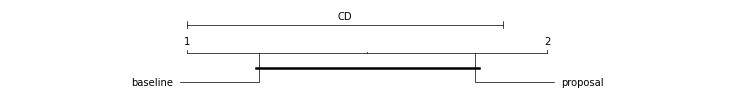

In [11]:
import Orange

import matplotlib.pyplot as plt
# Algoritmos
names = df.method.values
plt.figure(figsize=(2, 2))
# Ranking Medio
avranks =  df.average_rank.values

# Num. de datasets:
datasets = 5

cd = Orange.evaluation.compute_CD(avranks, datasets)

Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=10, textspace=2.5)

plt.draw()
plt.savefig("eval1.pdf",pad_inches=0)
plt.savefig("eval1.png",pad_inches=0)



plt.show()
plt.close()

# Entendendo o diagrama

Os métodos são ordenados em um ranking médio.

O teste de friedman calcula qual é a diferença mínima no ranking para que se possa afirmar que um método é superior a outro. Essa diferença se chama CD (critical difference).

Linhas conectam métodos sem CD significativo.

No exemplo acima, apenas GNEE é superior ao Struct2Vec